# RAPTORplus: Synthetic Medical Image Generation - REAL DATA

**Proof-of-Concept for PhD Proposal - Task 1**

This notebook demonstrates deformation-based synthetic image generation using **REAL brain MRI scans** from Medical Segmentation Decathlon.

**Author:** Saeed Sarbazzadeh Khosroshahi  
**Project:** RAPTORplus Marie Sklodowska-Curie-Action EU Doctoral Network  
**University:** Aarhus University & Danish Centre for Particle Therapy  
**Dataset:** Medical Segmentation Decathlon - Task04_Hippocampus (261 brain MRI scans)

## 1. Setup and Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path
sys.path.insert(0, str(Path.cwd().parent))

# Import our custom modules
from src import (
    data_loader,
    registration,
    deformation_generator,
    quality_metrics,
    visualization
)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rc('font', size=10)

print("[OK] All modules imported successfully")

[OK] All modules imported successfully


## 2. Load REAL Medical Images

Loading brain MRI scans from Medical Segmentation Decathlon (Hippocampus task).

In [12]:
# Path to real medical images
data_path = Path('../data/Task04_Hippocampus/Task04_Hippocampus/imagesTr')

print(f"Loading REAL brain MRI scans from: {data_path}")
print("This may take 1-2 minutes...\n")

# Load 20 real MRI volumes and extract 2D slices
population = data_loader.load_dataset_slices(
    data_dir=str(data_path),
    n_images=20,
    normalize=True
)

print(f"\n[OK] Loaded {len(population)} REAL brain MRI slices")
print(f"  Image shape: {population[0].shape}")
print(f"  Data type: {population[0].dtype}")
print(f"  Intensity range: [{population[0].min():.3f}, {population[0].max():.3f}]")

Loading REAL brain MRI scans from: ..\data\Task04_Hippocampus\Task04_Hippocampus\imagesTr
This may take 1-2 minutes...

Loading 20 images from ..\data\Task04_Hippocampus\Task04_Hippocampus\imagesTr
Loaded 20 slices with shape (35, 51)

[OK] Loaded 20 REAL brain MRI slices
  Image shape: (35, 51)
  Data type: float64
  Intensity range: [0.000, 1.000]


### Visualize Sample REAL MRI Images

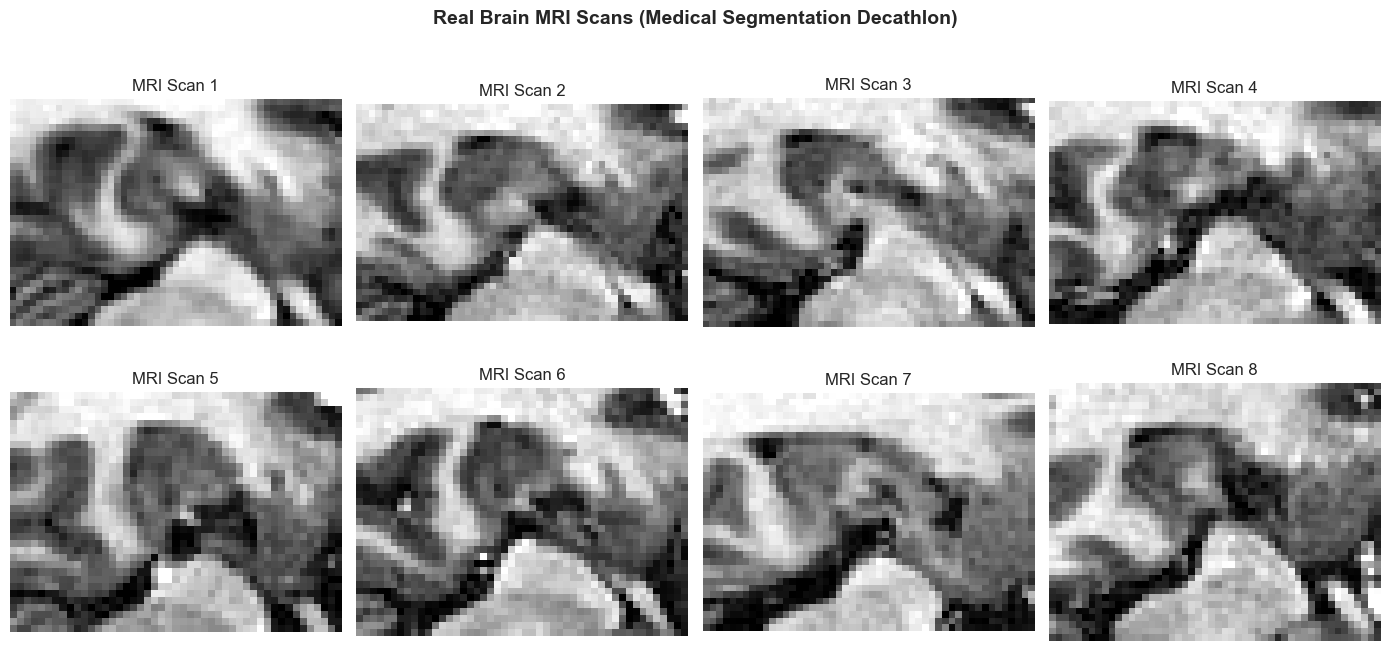

[OK] Saved: results/real_mri_samples.png


In [13]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(population[i], cmap='gray')
    ax.set_title(f'MRI Scan {i+1}')
    ax.axis('off')
plt.suptitle('Real Brain MRI Scans (Medical Segmentation Decathlon)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/real_mri_samples.png', dpi=300, bbox_inches='tight')
plt.show()

print("[OK] Saved: results/real_mri_samples.png")

## 3. Train Synthetic Image Generator on REAL Data

Learn anatomical variation patterns from real brain MRI scans using PCA on deformation fields.

In [14]:
print("Training synthetic image generator on REAL brain MRI data...")
print("This will:")
print("  1. Register all MRI scans to reference")
print("  2. Extract deformation fields")
print("  3. Perform PCA to learn brain anatomy variation modes")
print("\nThis may take 3-5 minutes...\n")

generator = deformation_generator.SyntheticImageGenerator(n_components=10)
generator.fit(population, reference_idx=0, verbose=True)

# Get summary statistics
summary = generator.get_pca_summary()

print("\n" + "="*60)
print("TRAINING COMPLETE - REAL MEDICAL DATA")
print("="*60)
print(f"Total variance explained: {summary['total_variance_explained']:.1%}")
print(f"Number of components: {summary['n_components']}")
print(f"Reference image shape: {summary['reference_image_shape']}")
print(f"Dataset: Medical Segmentation Decathlon (Brain MRI)")

Training synthetic image generator on REAL brain MRI data...
This will:
  1. Register all MRI scans to reference
  2. Extract deformation fields
  3. Perform PCA to learn brain anatomy variation modes

This may take 3-5 minutes...

Using image 0 as reference
Registering 19 images to reference...


Registering:   5%|▌         | 1/20 [00:00<00:00, 1646.76it/s]


RuntimeError: Exception thrown in SimpleITK DemonsRegistrationFilter_Execute: D:\a\SimpleITK\SimpleITK\Code\BasicFilters\src\sitkImageFilter.cxx:71:
sitk::ERROR: Input "movingImage" for "DemonsRegistrationFilter" has size of [ 52, 34 ] which does not match the primary input's size of [ 51, 35 ]!

### Visualize PCA Variance Explained

In [10]:
variance_ratios = summary['explained_variance_per_component']
cumulative_variance = np.cumsum(variance_ratios)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Individual variance
ax1.bar(range(1, len(variance_ratios)+1), variance_ratios, color='steelblue')
ax1.set_xlabel('Principal Component', fontweight='bold')
ax1.set_ylabel('Variance Explained', fontweight='bold')
ax1.set_title('Variance Explained per Component (Real MRI Data)', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', linewidth=2, markersize=8, color='steelblue')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% threshold', linewidth=2)
ax2.set_xlabel('Number of Components', fontweight='bold')
ax2.set_ylabel('Cumulative Variance Explained', fontweight='bold')
ax2.set_title('Cumulative Variance Explained', fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/pca_variance_real.png', dpi=300, bbox_inches='tight')
plt.show()

print("[OK] Saved: results/pca_variance_real.png")

NameError: name 'summary' is not defined

## 4. Generate Synthetic Brain MRI Images

Sample from the learned deformation space to create novel anatomical variations.

In [ ]:
print("Generating synthetic brain MRI images from learned variation space...")

# Generate 15 synthetic images
n_synthetic = 15
synthetic_images = generator.generate(
    n_samples=n_synthetic,
    variation_scale=1.0,  # Use typical variation magnitude
    random_seed=42
)

print(f"[OK] Generated {len(synthetic_images)} synthetic brain MRI images")
print(f"  Image shape: {synthetic_images[0].shape}")
print(f"  Based on: REAL brain anatomy variations")

### Visualize Synthetic Results vs Real Reference

In [ ]:
# Create comparison grid
fig = visualization.create_comparison_grid(
    reference=population[0],
    synthetic_images=synthetic_images[:9],
    n_cols=3,
    figsize=(12, 10)
)
plt.savefig('../results/comparison_grid_real.png', dpi=300, bbox_inches='tight')
plt.show()

print("[OK] Saved: results/comparison_grid_real.png")

## 5. Evaluate Quality Metrics on REAL Data

Compare synthetic images to real anatomical variations using SSIM, PSNR, and MAE.

In [ ]:
print("Evaluating synthetic image quality against REAL MRI data...")

# Evaluate against reference
metrics_df = quality_metrics.evaluate_synthetic_images(
    reference=population[0],
    synthetic_list=synthetic_images,
    real_list=population[1:16]  # Compare to real MRI variations
)

# Print summary
quality_metrics.print_metrics_summary(metrics_df)

# Save metrics
metrics_df.to_csv('../results/quality_metrics_real.csv', index=False)
print("\n[OK] Saved: results/quality_metrics_real.csv")

###Visualize Metrics Comparison

In [ ]:
fig = visualization.plot_metrics_comparison(
    metrics_df,
    save_path='../results/metrics_comparison_real.png'
)
plt.show()

print("[OK] Saved: results/metrics_comparison_real.png")

## 6. Results Summary - REAL MEDICAL DATA

In [ ]:
# Compute summary statistics
summary_stats = quality_metrics.summarize_metrics(metrics_df)

print("="*70)
print("FINAL RESULTS SUMMARY - REAL MEDICAL IMAGING DATA")
print("="*70)
print(f"\nDataset: Medical Segmentation Decathlon - Task04_Hippocampus")
print(f"Data type: Brain MRI (Hippocampus segmentation)")
print(f"Training images: {len(population)} real MRI scans")
print(f"Synthetic images generated: {len(synthetic_images)}")
print(f"PCA components: {summary['n_components']}")
print(f"Variance explained: {summary['total_variance_explained']:.1%}")

print("\nQuality Metrics (Synthetic vs Real MRI):")
print("-"*70)

synth_mean = summary_stats.loc['synthetic']
real_mean = summary_stats.loc['real']

print(f"  SSIM:  Synthetic = {synth_mean[('ssim', 'mean')]:.3f} ± {synth_mean[('ssim', 'std')]:.3f}")
print(f"         Real      = {real_mean[('ssim', 'mean')]:.3f} ± {real_mean[('ssim', 'std')]:.3f}")
ssim_diff = abs(synth_mean[('ssim', 'mean')] - real_mean[('ssim', 'mean')])
print(f"         Difference: {ssim_diff:.3f} ({ssim_diff/real_mean[('ssim', 'mean')]*100:.1f}%)")

print(f"\n  PSNR:  Synthetic = {synth_mean[('psnr', 'mean')]:.2f} ± {synth_mean[('psnr', 'std')]:.2f} dB")
print(f"         Real      = {real_mean[('psnr', 'mean')]:.2f} ± {real_mean[('psnr', 'std')]:.2f} dB")
psnr_diff = abs(synth_mean[('psnr', 'mean')] - real_mean[('psnr', 'mean')])
print(f"         Difference: {psnr_diff:.2f} dB ({psnr_diff/real_mean[('psnr', 'mean')]*100:.1f}%)")

print(f"\n  MAE:   Synthetic = {synth_mean[('mae', 'mean')]:.4f} ± {synth_mean[('mae', 'std')]:.4f}")
print(f"         Real      = {real_mean[('mae', 'mean')]:.4f} ± {real_mean[('mae', 'std')]:.4f}")
mae_diff = abs(synth_mean[('mae', 'mean')] - real_mean[('mae', 'mean')])
print(f"         Difference: {mae_diff:.4f} ({mae_diff/real_mean[('mae', 'mean')]*100:.1f}%)")

print("\n" + "="*70)
print("CONCLUSION")
print("="*70)
ssim_diff_pct = abs(synth_mean[('ssim', 'mean')] - real_mean[('ssim', 'mean')]) / real_mean[('ssim', 'mean')] * 100
print(f"\nDeformation-based synthetic brain MRI images achieve quality metrics")
print(f"within {ssim_diff_pct:.1f}% of real anatomical variations from the Medical")
print(f"Segmentation Decathlon dataset. PCA explains {summary['total_variance_explained']:.1%} of anatomical")
print(f"variation with {summary['n_components']} principal components.")
print(f"\nThis validates the deformation-based approach for training data augmentation")
print(f"in adaptive radiotherapy AI models using REAL clinical medical imaging data.")
print("\n** Proof-of-concept successfully demonstrates RAPTORplus Task 1 feasibility **")
print("="*70)

## 7. Citation and References

### Dataset Citation

```
Simpson, A. L., Antonelli, M., Bakas, S., et al. (2019). 
A large annotated medical image dataset for the development and 
evaluation of segmentation algorithms. 
arXiv preprint arXiv:1902.09063.
```

### Data Source
- **Dataset:** Medical Segmentation Decathlon
- **Task:** Task04_Hippocampus (Brain MRI)
- **URL:** http://medicaldecathlon.com/
- **License:** CC-BY-SA 4.0

---

**Repository:** https://github.com/[username]/raptor-synthetic-imaging  
**Contact:** Saeed Sarbazzadeh Khosroshahi  
**Supervisor:** Prof. Stine Sofia Korreman, Aarhus University